In [1]:
import os
import pandas as pd
import numpy as np
import simplejson as json
import utils

DATA_PATH = "./data/"

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/juanse/Documents/repos/fundacion-argentina-porvenir/comuna-tracker/utils.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Sha

In [2]:
import geopandas as gpd

In [3]:
import importlib
importlib.reload(utils)

<module 'utils' from '/home/juanse/Documents/repos/fundacion-argentina-porvenir/comuna-tracker/utils.py'>

# Get BA Map

In [4]:
from pyrosm import OSM, get_data

# Parse pbf file
# osm_ba = OSM("./res/argentina-latest.osm.pbf")

In [5]:
streets = gpd.read_file("./res/calles-geojson.json", driver="GeoJSON")
streets.head()

WKT    id codigo  \
0  MULTILINESTRING ((-58.4292181631792 -34.550847...   896  16003   
1  MULTILINESTRING ((-58.4111723965244 -34.557682...  1724  16003   
2  MULTILINESTRING ((-58.4843475765456 -34.557679...  1729  19028   
3  MULTILINESTRING ((-58.4097807451194 -34.558784...  1828  16003   
4  MULTILINESTRING ((-58.4809938700341 -34.560479...  1997  21059   

                      nomoficial alt_izqini alt_izqfin alt_derini alt_derfin  \
0  OBLIGADO RAFAEL, Av.Costanera       6182       6200       6181       6199   
1  OBLIGADO RAFAEL, Av.Costanera       4202       4500       4201       4499   
2        LARRALDE, CRISOLOGO AV.       4202       4220       4201       4219   
3  OBLIGADO RAFAEL, Av.Costanera       3452       4200       3451       4199   
4                       TRONADOR          0          0          0          0   

               nomanter                      nom_mapa  ... red_tp ffcc  \
0  COSTANERA NORTE, Av.  AV.COSTANERA RAFAEL OBLIGADO  ...               
1  COSTANERA NORTE, Av.  AV.COSTANERA RAFAEL OBLIGADO  ...               
2         REPUBLIQUETAS        AV. CRISOLOGO LARRALDE  ...          SI   
3  COSTANERA NORTE, Av.  AV.COSTANERA RAFAEL OBLIGADO  ...               
4       ESTOMBA Y PLAZA                      TRONADOR  ...               

      tipo_ffcc COMUNA COM_PAR COM_IMPAR    BARRIO BARRIO_PAR BARRIO_IMP  \
0                   13      13        13   PALERMO    PALERMO    PALERMO   
1                   14      14        14   PALERMO    PALERMO    PALERMO   
2  Paso a Nivel     12      12        12  SAAVEDRA   SAAVEDRA   SAAVEDRA   
3                   14      14        14   PALERMO    PALERMO    PALERMO   
4                   12      12        12   COGHLAN    COGHLAN    COGHLAN   

                                            geometry  
0  MULTILINESTRING ((-58.42922 -34.55085, -58.429...  
1  MULTILINESTRING ((-58.41117 -34.55768, -58.412...  
2  MULTILINESTRING ((-58.48435 -34.55768, -58.484...  
3  MULTILINESTRING ((-58.40978 -34.55878, -58.410...  
4  MULTILINESTRING ((-58.48099 -34.56048, -58.481...  

[5 rows x 31 columns]

<Axes: >

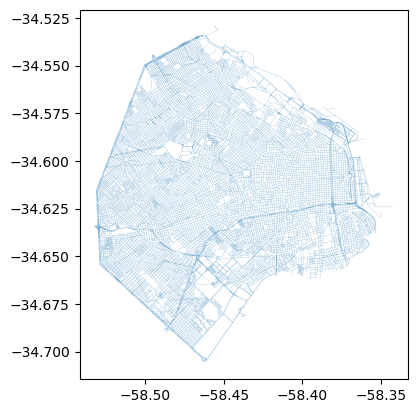

In [6]:
streets.plot(linewidth=.1)

<Axes: >

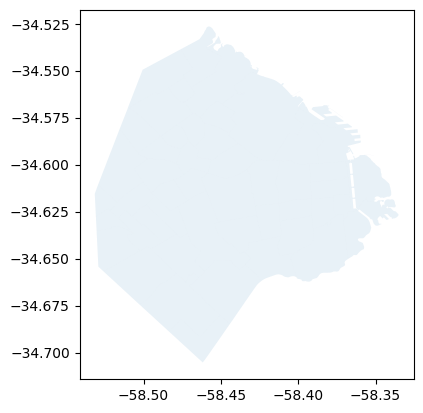

In [146]:
barrios = gpd.read_file("./res/barrios-geojson.json", driver="GeoJSON")
barrios.plot(linewidth=.1, alpha=.1)

# Atención Ciudadana SUAC

In [8]:
suac_data = pd.read_csv(os.path.join(DATA_PATH, "sistema-unico-de-atencion-ciudadana-2022.csv"), sep=";")

## Concatenate 2021 and 2022 data
suac_data.fecha_ingreso = pd.to_datetime(suac_data.fecha_ingreso, format="%Y-%m-%d")
suac_data.fecha_cierre_contacto = pd.to_datetime(suac_data.fecha_cierre_contacto, format="%Y-%m-%d")

suac_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104912 entries, 0 to 104911
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   contacto                   104912 non-null  object        
 1   periodo                    104912 non-null  int64         
 2   categoria                  102321 non-null  object        
 3   subcategoria               102321 non-null  object        
 4   prestacion                 102362 non-null  object        
 5   tipo_prestacion            102362 non-null  object        
 6   fecha_ingreso              104912 non-null  datetime64[ns]
 7   hora_ingreso               104912 non-null  object        
 8   domicilio_comuna           103229 non-null  float64       
 9   domicilio_barrio           103227 non-null  object        
 10  domicilio_calle            92986 non-null   object        
 11  domicilio_altura           89821 non-null   float64 

In [9]:
suac_data.sample()

contacto  periodo                              categoria  \
13539  00013997/22   202201  FISCALIZACIÓN ACTIVIDADES COMERCIALES   

                          subcategoria  \
13539  HIGIENE Y SEGURIDAD ALIMENTARIA   

                                            prestacion tipo_prestacion  \
13539  Irregularidades en la manipulación de alimentos        Denuncia   

      fecha_ingreso hora_ingreso  domicilio_comuna domicilio_barrio  \
13539    2022-01-13     11:13:25               7.0           Flores   

      domicilio_calle  domicilio_altura domicilio_esquina_proxima       lat  \
13539   RIVADAVIA AV.            7636.0                       NaN -34.63168   

             lon    canal     genero estado_del_contacto fecha_cierre_contacto  
13539 -58.472737  GCS Web  Masculino             Cerrado            2022-01-19

In [10]:
suac_data.categoria.value_counts()

LIMPIEZA Y RECOLECCIÓN                   41557
TRÁNSITO                                 18188
BARRIOS EMERGENTES                        9589
CALLES Y VEREDAS                          7897
ARBOLADO Y ESPACIOS VERDES                7313
ALUMBRADO                                 4238
TRÁMITES Y SERVICIOS                      3178
RECICLADO Y PROTECCIÓN AMBIENTAL          2963
FISCALIZACIÓN ACTIVIDADES COMERCIALES     1919
ORDENAMIENTO DEL ESPACIO PÚBLICO          1741
CONTROL EDILICIO, OBRAS Y CATASTRO        1620
SEGURIDAD                                  683
PLUVIALES                                  479
MEDIOS DE TRANSPORTE                       469
SALUD Y SERVICIOS SOCIALES                 213
TERRENO BALDÍO                             190
DESARROLLO URBANO                           62
EDUCACION                                   22
Name: categoria, dtype: int64

In [11]:
suac_data.groupby(["categoria", "subcategoria"]).size().to_frame().reset_index().rename(columns={0: "count"})

categoria                                  subcategoria  \
0                    ALUMBRADO         LIMPIEZA DE EQUIPAMIENTO DE ALUMBRADO   
1                    ALUMBRADO                    MAYOR ILUMINACIÓN EN CALLE   
2                    ALUMBRADO       REPARACIÓN DE EQUIPAMIENTO DE ALUMBRADO   
3                    ALUMBRADO                       REPARACIÓN DE LUMINARIA   
4   ARBOLADO Y ESPACIOS VERDES                           EXTRACCIÓN DE ÁRBOL   
..                         ...                                           ...   
69        TRÁMITES Y SERVICIOS         PROPUESTAS PARA LA MEJORA EN TRÁMITES   
70                    TRÁNSITO                                 DENUNCIA VIAL   
71                    TRÁNSITO  MARCAS VIALES Y SEÑALES DE TRÁNSITO EN CALLE   
72                    TRÁNSITO                                     SEMÁFOROS   
73                    TRÁNSITO                         VEHÍCULOS ABANDONADOS   

    count  
0      51  
1     661  
2     589  
3    2937  
4    1095  
..    ...  
69    254  
70  15348  
71    144  
72    385  
73   2311  

[74 rows x 3 columns]

### Feature Overview 

In [12]:
suac_data.canal.value_counts()

App BA 147           40463
GCS Web              39654
Boti                  9970
Operador UGIS         9582
Comuna                2137
Operador FIXIT        1711
Operador GCBA          820
App Denuncia Vial      497
Mail 147                76
Call Center              2
Name: canal, dtype: int64

In [13]:
suac_data[suac_data.categoria == "SEGURIDAD"].canal.value_counts()

App BA 147        432
GCS Web           195
Operador FIXIT     50
Comuna              5
Operador GCBA       1
Name: canal, dtype: int64

In [14]:
suac_data[suac_data.categoria == "EDUCACION"].canal.value_counts()

App BA 147       15
GCS Web           6
Operador GCBA     1
Name: canal, dtype: int64

In [15]:
suac_data.categoria.unique()

array(['BARRIOS EMERGENTES', 'LIMPIEZA Y RECOLECCIÓN', 'SEGURIDAD',
       'TRÁMITES Y SERVICIOS', 'ARBOLADO Y ESPACIOS VERDES', 'ALUMBRADO',
       'CALLES Y VEREDAS', 'RECICLADO Y PROTECCIÓN AMBIENTAL',
       'ORDENAMIENTO DEL ESPACIO PÚBLICO',
       'FISCALIZACIÓN ACTIVIDADES COMERCIALES', 'TRÁNSITO', 'PLUVIALES',
       'MEDIOS DE TRANSPORTE', 'CONTROL EDILICIO, OBRAS Y CATASTRO',
       'SALUD Y SERVICIOS SOCIALES', 'TERRENO BALDÍO',
       'DESARROLLO URBANO', nan, 'EDUCACION'], dtype=object)

In [16]:
## Drop rows with no category
suac_data = suac_data[~suac_data.categoria.isnull()]

In [30]:
## Date coverage
print(f"Rango fecha de ingreso: \nMIN: {suac_data.fecha_ingreso.min()} \nMAX: {suac_data.fecha_ingreso.max()}")
print(f"\n\nRango fechas de cierre: \nMIN: {suac_data.fecha_cierre_contacto.min()} \nMAX: {suac_data.fecha_cierre_contacto.max()}")


Rango fecha de ingreso: 
MIN: 2022-01-01 00:00:00 
MAX: 2022-03-13 00:00:00


Rango fechas de cierre: 
MIN: 2022-01-01 00:00:00 
MAX: 2022-03-12 00:00:00


In [18]:
suac_data.fecha_ingreso.isnull().value_counts()

False    102321
Name: fecha_ingreso, dtype: int64

In [19]:
# Group all rows by month of fecha_ingreso and count how many rows are in each month
suac_data.groupby(suac_data.fecha_ingreso.dt.to_period("M")).size().to_frame()\
    .reset_index()\
    .rename(columns={0: "count"})

fecha_ingreso  count
0       2022-01  39231
1       2022-02  42440
2       2022-03  20650

In [24]:
suac_data.contacto.duplicated().any()

False

In [26]:
suac_data.estado_del_contacto.value_counts()

Cerrado    69896
Abierto    32425
Name: estado_del_contacto, dtype: int64

In [28]:
suac_data.categoria.value_counts()

categorias = suac_data.categoria.unique()

### Check if .xlsx file has better coverage

In [83]:
# Read excel

## Read excel file
suac_data_excelfile = pd.read_excel(os.path.join(DATA_PATH, "sistema-unico-de-atencion-ciudadana-2022.xlsx"))
suac_data_excelfile.sample()

contacto  periodo           categoria     subcategoria  \
93271  00089556/22   202203  BARRIOS EMERGENTES  DESOBSTRUCCIÓN    

                    prestacion tipo_prestacion fecha_ingreso hora_ingreso  \
93271  Desobstrucción (Vactor)       Solicitud    2022-03-04     02:28:45   

       domicilio_comuna domicilio_barrio domicilio_calle  domicilio_altura  \
93271               8.0    Villa Soldati             NaN               NaN   

      domicilio_esquina_proxima        lat        lon          canal genero  \
93271                       NaN -34.657707 -58.458384  Operador UGIS    NaN   

      estado_del_contacto fecha_cierre_contacto  
93271             Cerrado            2022-03-07

In [84]:
suac_data_excelfile.fecha_ingreso = pd.to_datetime(suac_data_excelfile.fecha_ingreso, format="%Y-%m-%d")
suac_data_excelfile.fecha_cierre_contacto = pd.to_datetime(suac_data_excelfile.fecha_cierre_contacto, format="%Y-%m-%d")

#### Date Ranges

In [29]:
print("Excel File date range")
print(f"Fecha Ingreso: \nMIN: {suac_data_excelfile.fecha_ingreso.min()}\nMAX: {suac_data_excelfile.fecha_ingreso.max()}")
print(f"\n\nFecha Cierre: \nMIN: {suac_data_excelfile.fecha_cierre_contacto.min()}\nMAX: {suac_data_excelfile.fecha_cierre_contacto.max()}")

Excel File date range


NameError: name 'suac_data_excelfile' is not defined

Same issue

In [58]:
## convert suac_data dataframe to geodataframe using lat and lon
suac_data_gdf = gpd.GeoDataFrame(suac_data, geometry=gpd.points_from_xy(suac_data.lon, suac_data.lat))

### Visuals

<Axes: xlabel='lat', ylabel='lon'>

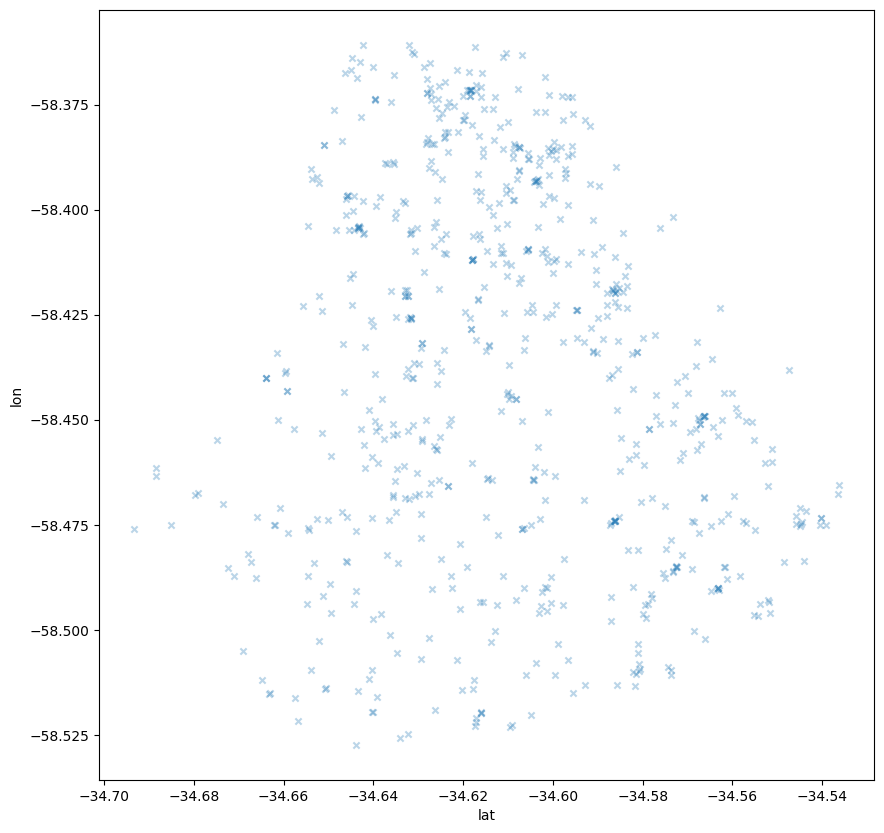

In [31]:
suac_data[suac_data.categoria == "SEGURIDAD"].plot(x="lat", y="lon", kind="scatter", figsize=(10, 10), alpha=.3, marker="x")

Text(0.5, 1.0, 'Reclamo en Categoría SEGURIDAD - 2022')

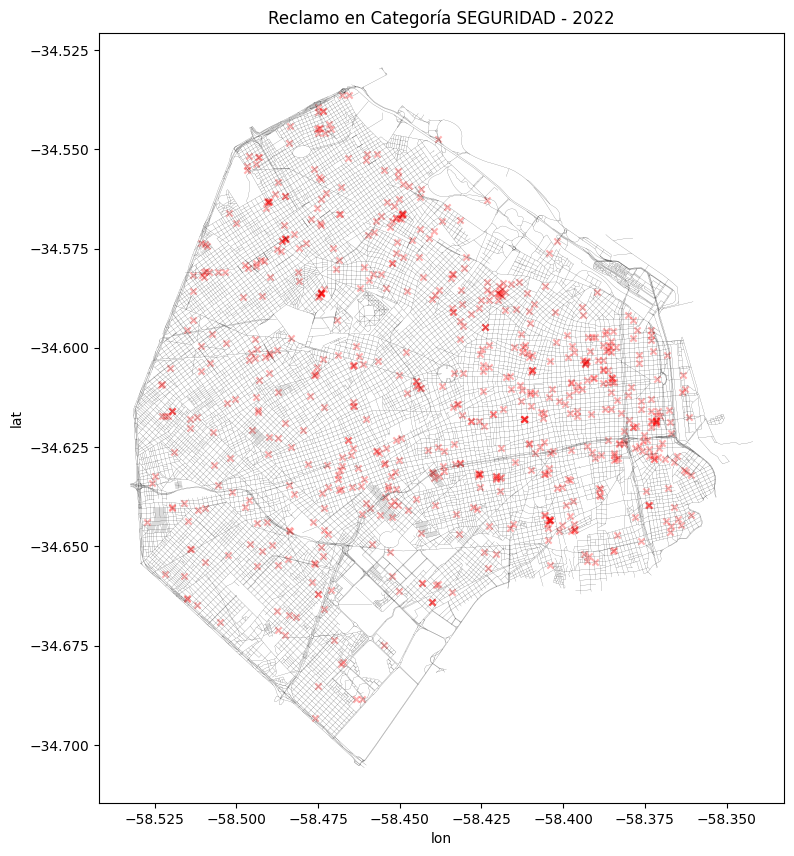

In [32]:
## Overlay plots
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 10))

streets.plot(ax=ax, linewidth=.1, color="black")
suac_data[suac_data.categoria == "SEGURIDAD"].plot(ax=ax, x="lon", y="lat", kind="scatter", alpha=.3, marker="x", color="red")

plt.title("Reclamo en Categoría SEGURIDAD - 2022")


In [33]:
suac_data.categoria.value_counts()

LIMPIEZA Y RECOLECCIÓN                   41557
TRÁNSITO                                 18188
BARRIOS EMERGENTES                        9589
CALLES Y VEREDAS                          7897
ARBOLADO Y ESPACIOS VERDES                7313
ALUMBRADO                                 4238
TRÁMITES Y SERVICIOS                      3178
RECICLADO Y PROTECCIÓN AMBIENTAL          2963
FISCALIZACIÓN ACTIVIDADES COMERCIALES     1919
ORDENAMIENTO DEL ESPACIO PÚBLICO          1741
CONTROL EDILICIO, OBRAS Y CATASTRO        1620
SEGURIDAD                                  683
PLUVIALES                                  479
MEDIOS DE TRANSPORTE                       469
SALUD Y SERVICIOS SOCIALES                 213
TERRENO BALDÍO                             190
DESARROLLO URBANO                           62
EDUCACION                                   22
Name: categoria, dtype: int64

In [34]:
def plot_map_category(suac_data, category, figsize=(10, 10), **suac_plot_args):
    fig, ax = plt.subplots(1,1, figsize=(10, 10))
    streets.plot(ax=ax, linewidth=.1, color="black")
    suac_data[suac_data.categoria == category].plot(ax=ax, x="lon", y="lat", kind="scatter", **suac_plot_args)
    plt.title(category)
    
    return ax

<Axes: title={'center': 'EDUCACION'}, xlabel='lon', ylabel='lat'>

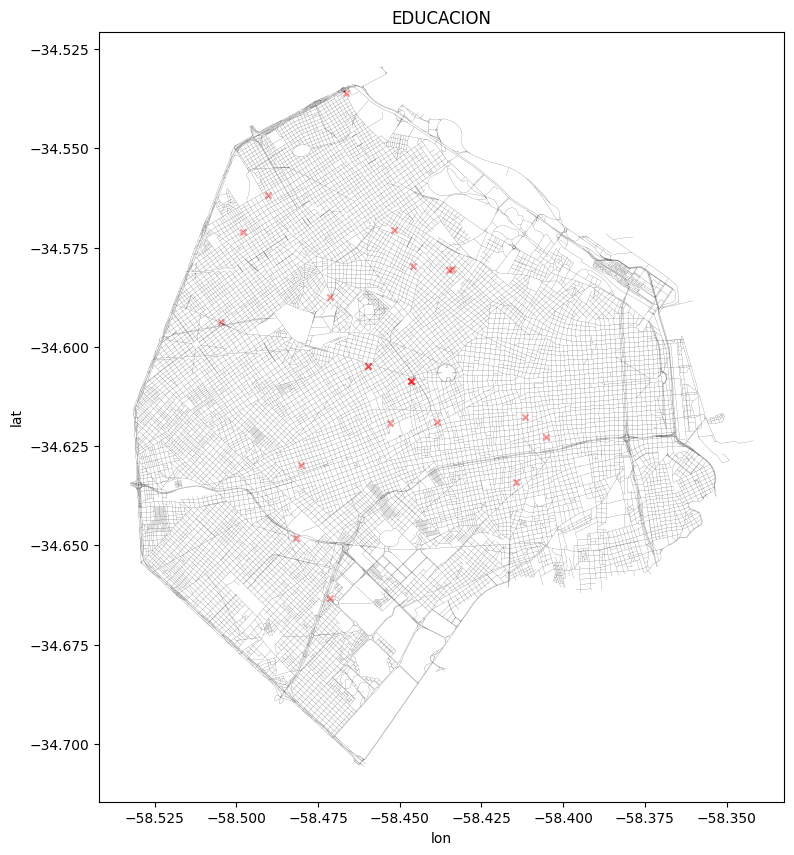

In [35]:
plot_map_category(suac_data, "EDUCACION", marker="x", color="red", alpha=.4)

<Axes: title={'center': 'CALLES Y VEREDAS'}, xlabel='lon', ylabel='lat'>

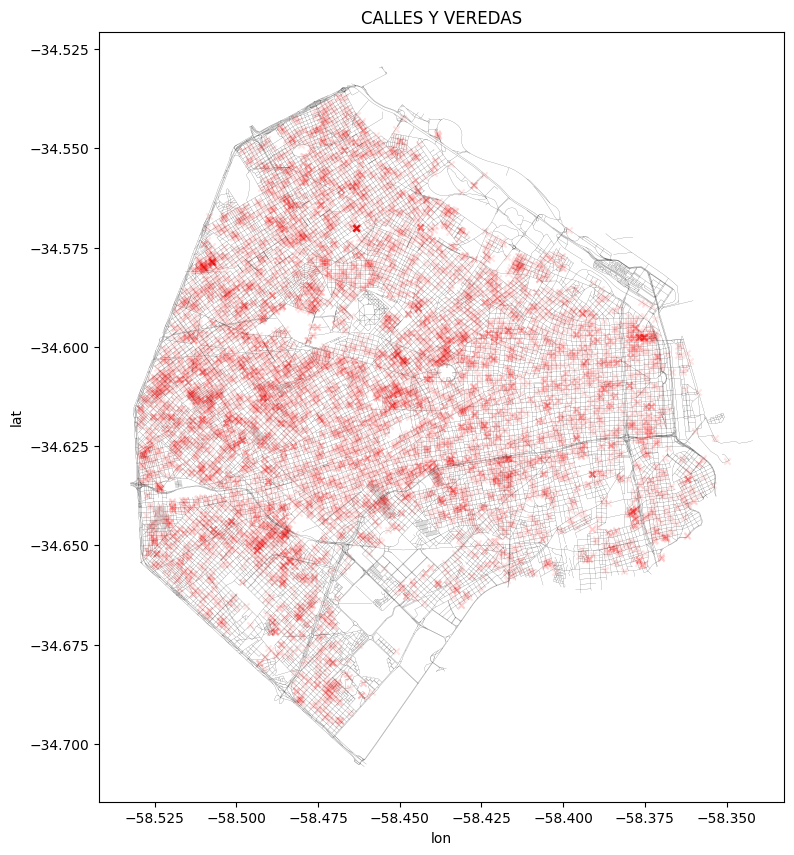

In [36]:
plot_map_category(suac_data, "CALLES Y VEREDAS", marker="x", color="red", alpha=.1)

# Foco en C4

In [41]:
## Convert suac_data dataframe to geodataframe using lat and lon
suac_data_gdf = gpd.GeoDataFrame(suac_data, geometry=gpd.points_from_xy(suac_data.lon, suac_data.lat))

In [40]:
comunas = gpd.read_file("./res/comunas-geojson.json", driver="GeoJSON")
comunas.head()

ID          OBJETO  COMUNAS  \
0   1  LIMITE COMUNAL      2.0   
1   3  LIMITE COMUNAL      6.0   
2   6  LIMITE COMUNAL     10.0   
3   7  LIMITE COMUNAL     11.0   
4   8  LIMITE COMUNAL     12.0   

                                             BARRIOS     PERIMETRO  \
0                                           RECOLETA  21452.838648   
1                                          CABALLITO  10990.964471   
2  FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...  18332.037457   
3  VILLA DEL PARQUE - VILLA  DEVOTO - VILLA GRAL....  19987.696155   
4  COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...  17232.189372   

           AREA                                           geometry  
0  6.317265e+06  MULTIPOLYGON (((-58.38000 -34.57002, -58.38002...  
1  6.851029e+06  MULTIPOLYGON (((-58.43061 -34.60705, -58.43056...  
2  1.265656e+07  MULTIPOLYGON (((-58.48834 -34.62016, -58.48820...  
3  1.412004e+07  MULTIPOLYGON (((-58.49838 -34.59637, -58.49718...  
4  1.557093e+07  MULTIPOLYGON (((-58.50331 -34.59386, -58.50347...

In [42]:
comuna_4 = comunas[comunas.COMUNAS == 4]

In [43]:
suac_c4 = suac_data_gdf[suac_data_gdf.within(comuna_4.geometry.iloc[0])]

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/pygeos/predicates.py:906: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)


## General

In [67]:
suac_c4.sample()

contacto  periodo                         categoria  \
12232  00012599/22   202201  RECICLADO Y PROTECCIÓN AMBIENTAL   

                                  subcategoria                     prestacion  \
12232  RUIDOS MOLESTOS, EMANACIONES O DERRAMES  Ruidos molestos y vibraciones   

      tipo_prestacion fecha_ingreso hora_ingreso  domicilio_comuna  \
12232        Denuncia    2022-01-12     11:33:56               4.0   

       domicilio_barrio domicilio_calle  domicilio_altura  \
12232  Parque Patricios          MATHEU            1815.0   

      domicilio_esquina_proxima        lat        lon    canal     genero  \
12232                       NaN -34.630882 -58.397727  GCS Web  Masculino   

      estado_del_contacto fecha_cierre_contacto                     geometry  
12232             Abierto                   NaT  POINT (-58.39773 -34.63088)

In [68]:
suac_c4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6114 entries, 0 to 104908
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   contacto                   6114 non-null   object        
 1   periodo                    6114 non-null   int64         
 2   categoria                  6114 non-null   object        
 3   subcategoria               6114 non-null   object        
 4   prestacion                 6114 non-null   object        
 5   tipo_prestacion            6114 non-null   object        
 6   fecha_ingreso              6114 non-null   datetime64[ns]
 7   hora_ingreso               6114 non-null   object        
 8   domicilio_comuna           6114 non-null   float64       
 9   domicilio_barrio           6114 non-null   object        
 10  domicilio_calle            4208 non-null   object        
 11  domicilio_altura           4051 non-null   float64       
 

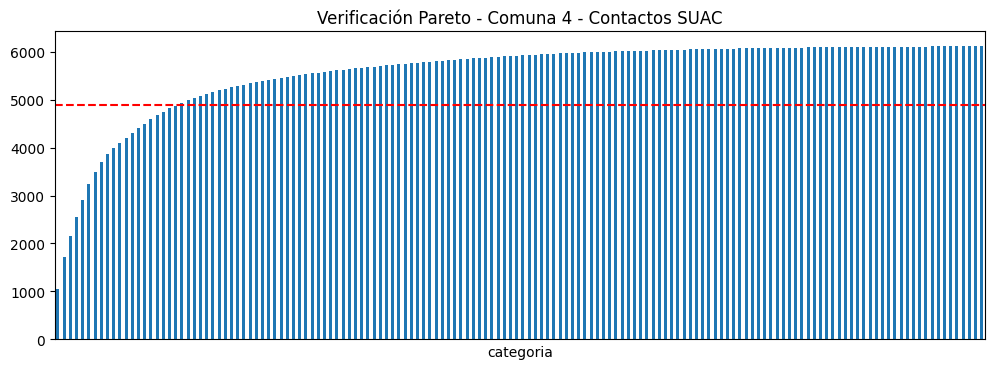

In [170]:
prestaciones_c4 = suac_c4.groupby(["categoria", "prestacion"]).contacto.size().sort_values(ascending=False).reset_index()
prestaciones_c4["cumsum"] = prestaciones_c4.contacto.cumsum()
pct80 = prestaciones_c4.contacto.sum() * .8

prestaciones_c4.plot(kind="bar", figsize=(12,4), x="categoria", y="cumsum")
# remove xticks
plt.xticks([])
plt.gca().axhline(pct80, color="red", linestyle="--") # graph Pareto-like behavior


plt.gca().legend().set_visible(False)
plt.gca().set_title("Verificación Pareto - Comuna 4 - Contactos SUAC")

prestaciones_c4[prestaciones_c4["cumsum"] <= pct80]

# save figure
plt.savefig("./visuals/pareto-suac-comuna4.png", dpi=300, bbox_inches="tight")

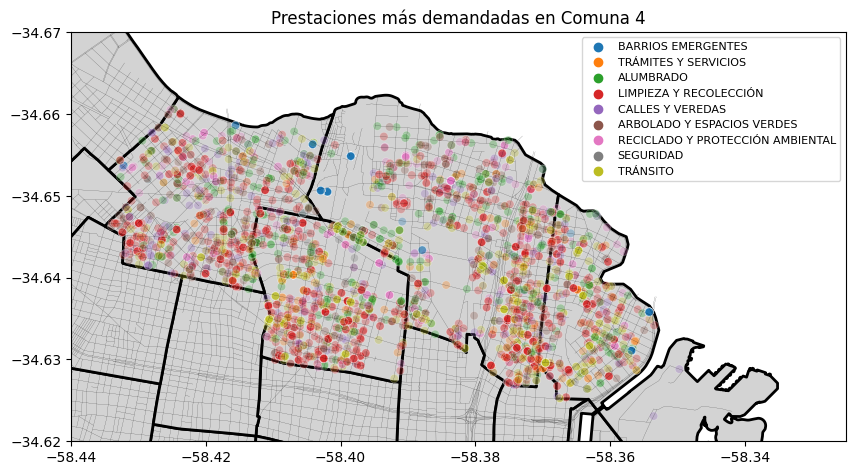

In [169]:
import seaborn as sns

def plot_map_prestaciones(suac_data, prestaciones, figsize=(10,10), **plot_args):
    """
    Plot filtering by specific prestaciones.
    """

    fig, ax = plt.subplots(1,1, figsize=figsize)

    aux = suac_data.copy()
    aux["cod_prestacion"] = aux.categoria + " - " + aux.prestacion
    aux = aux[aux.cod_prestacion.isin(prestaciones)]

    ## BUild a Seaborn scatter plot adding hue by categoria
    streets.plot(ax=ax, linewidth=.1, color="black")
    barrios.plot(ax=ax, color="lightgray", linewidth=2, edgecolor="black")
    sns.scatterplot(data=aux, x="lon", y="lat", hue="categoria", ax=ax, **plot_args)

    return ax

prestaciones_c4["cod_prestacion"] = prestaciones_c4.categoria + " - " + prestaciones_c4.prestacion

plot_map_prestaciones(suac_c4,
                    prestaciones_c4[(prestaciones_c4["cumsum"] <= pct80)].cod_prestacion,
                    # marker="x",
                    alpha=.3, figsize=(10,10))

## Reduce legend fontsize
plt.gca().legend(fontsize=8)

## Zoom in into Comuna 4
plt.xlim(-58.44, -58.325)
plt.ylim(-34.62, -34.67)

## Remove x and y labels
plt.xlabel("")
plt.ylabel("")
plt.title("Prestaciones más demandadas en Comuna 4")

## Save figure
plt.savefig("./visuals/top-prestaciones-comuna-4.png", dpi=300, bbox_inches="tight")

In [132]:
COMUNA4_BBOX = {
    "x": (-58.44, -58.325),
    "y": (-34.62, -34.67)
}

In [136]:
prestaciones_c4[prestaciones_c4["cumsum"] <= pct80]

categoria  \
0                 BARRIOS EMERGENTES   
1             LIMPIEZA Y RECOLECCIÓN   
2                 BARRIOS EMERGENTES   
3                           TRÁNSITO   
4                 BARRIOS EMERGENTES   
5                          ALUMBRADO   
6                   CALLES Y VEREDAS   
7         ARBOLADO Y ESPACIOS VERDES   
8   RECICLADO Y PROTECCIÓN AMBIENTAL   
9             LIMPIEZA Y RECOLECCIÓN   
10                          TRÁNSITO   
11              TRÁMITES Y SERVICIOS   
12            LIMPIEZA Y RECOLECCIÓN   
13            LIMPIEZA Y RECOLECCIÓN   
14            LIMPIEZA Y RECOLECCIÓN   
15            LIMPIEZA Y RECOLECCIÓN   
16        ARBOLADO Y ESPACIOS VERDES   
17                         SEGURIDAD   
18            LIMPIEZA Y RECOLECCIÓN   
19                         ALUMBRADO   

                                           prestacion  contacto  cumsum  \
0                             Desobstrucción (Vactor)      1060    1060   
1                Retiro de escombros / restos de obra       661    1721   
2                            Servicio de electricidad       441    2162   
3                            Vehículo mal estacionado       388    2550   
4                Desagote de pozo ciego (atmosférico)       361    2911   
5    Reparación de luminaria apagada durante la noche       326    3237   
6                                Reparación de vereda       251    3488   
7       Poda de árbol/despeje de luminaria o semáforo       218    3706   
8   Consulta de estado de expediente ante la Agenc...       164    3870   
9   Retiro de residuos voluminosos (muebles y elec...       127    3997   
10             Remoción de vehículo / auto abandonado       102    4099   
11                        Inconvenientes con trámites       102    4201   
12                                  Mejora de barrido       100    4301   
13        Retiro de restos de jardinería domiciliaria        97    4398   
14                          Reubicación de contenedor        96    4494   
15  Desratizar, desinsectar y desinfectar en vía p...        91    4585   
16                                Extracción de árbol        84    4669   
17                           Mayor presencia policial        74    4743   
18       Recolección de residuos fuera del contenedor        73    4816   
19                 Mayor iluminación en calle / plaza        60    4876   

                                       cod_prestacion  
0        BARRIOS EMERGENTES - Desobstrucción (Vactor)  
1   LIMPIEZA Y RECOLECCIÓN - Retiro de escombros /...  
2       BARRIOS EMERGENTES - Servicio de electricidad  
3                 TRÁNSITO - Vehículo mal estacionado  
4   BARRIOS EMERGENTES - Desagote de pozo ciego (a...  
5   ALUMBRADO - Reparación de luminaria apagada du...  
6             CALLES Y VEREDAS - Reparación de vereda  
7   ARBOLADO Y ESPACIOS VERDES - Poda de árbol/des...  
8   RECICLADO Y PROTECCIÓN AMBIENTAL - Consulta de...  
9   LIMPIEZA Y RECOLECCIÓN - Retiro de residuos vo...  
10  TRÁNSITO - Remoción de vehículo / auto abandonado  
11  TRÁMITES Y SERVICIOS - Inconvenientes con trám...  
12         LIMPIEZA Y RECOLECCIÓN - Mejora de barrido  
13  LIMPIEZA Y RECOLECCIÓN - Retiro de restos de j...  
14  LIMPIEZA Y RECOLECCIÓN - Reubicación de conten...  
15  LIMPIEZA Y RECOLECCIÓN - Desratizar, desinsect...  
16   ARBOLADO Y ESPACIOS VERDES - Extracción de árbol  
17               SEGURIDAD - Mayor presencia policial  
18  LIMPIEZA Y RECOLECCIÓN - Recolección de residu...  
19     ALUMBRADO - Mayor iluminación en calle / plaza

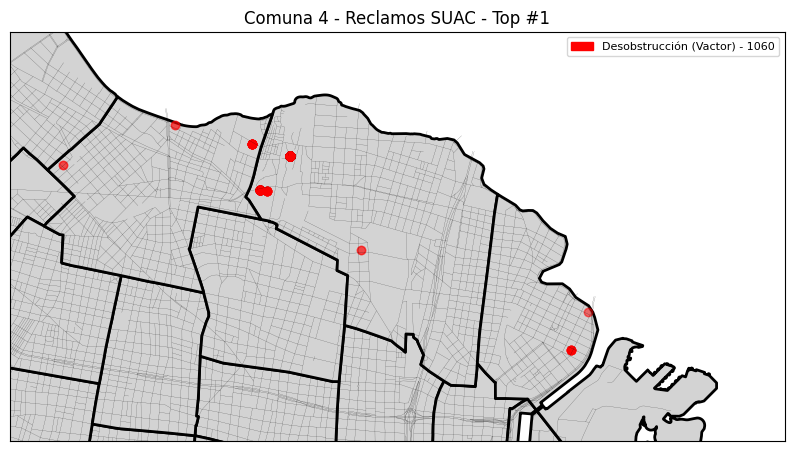

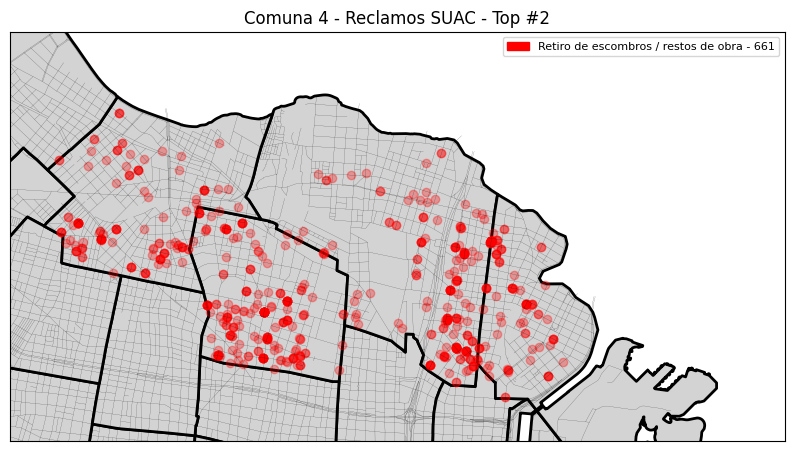

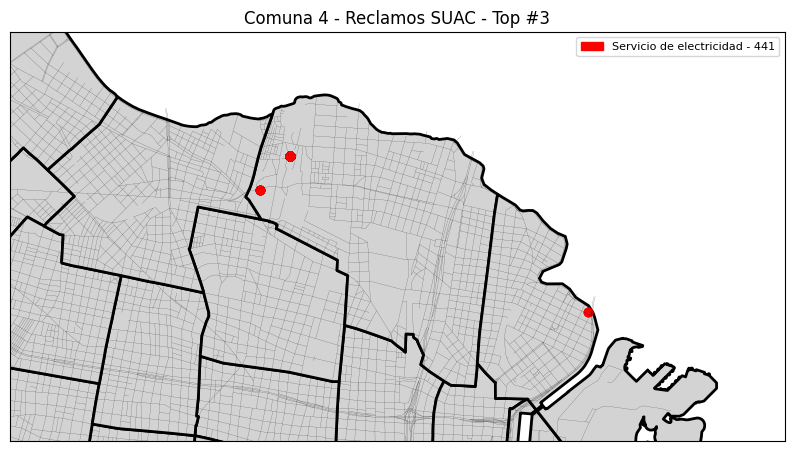

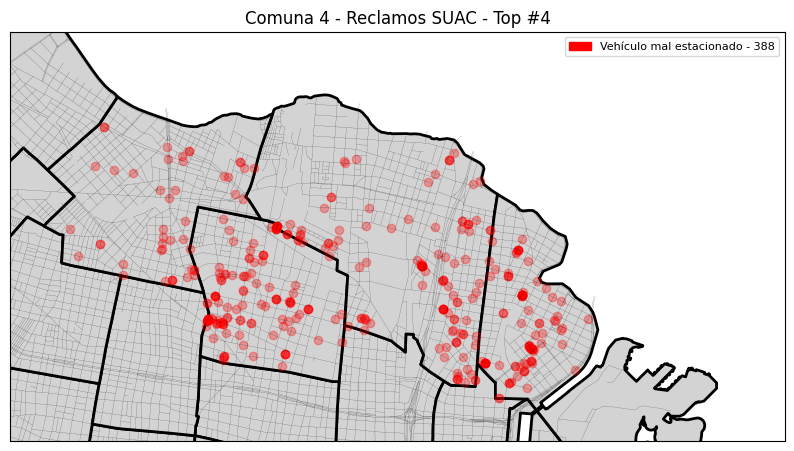

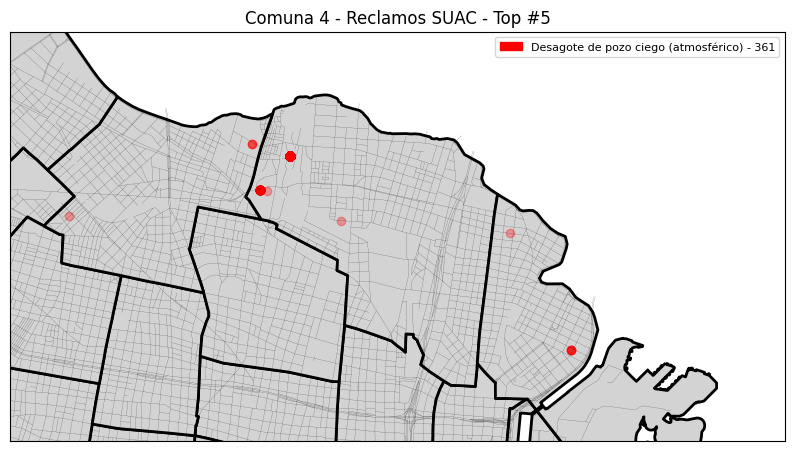

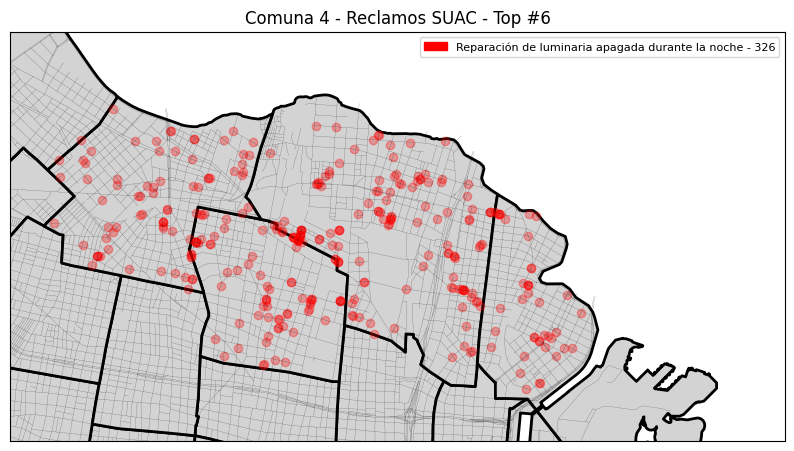

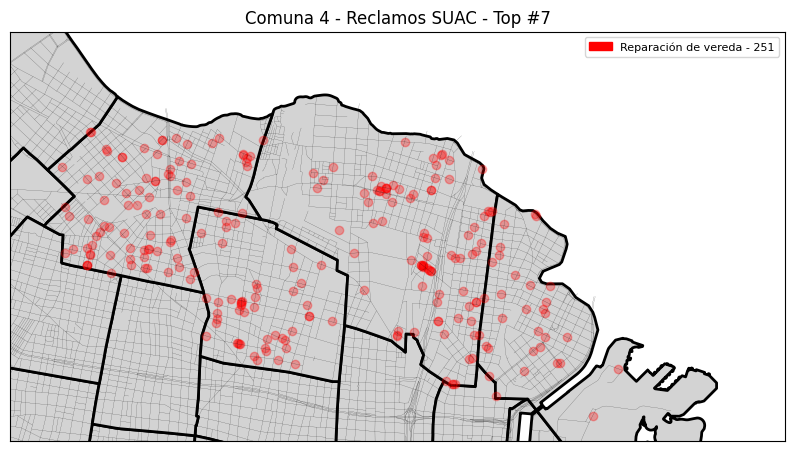

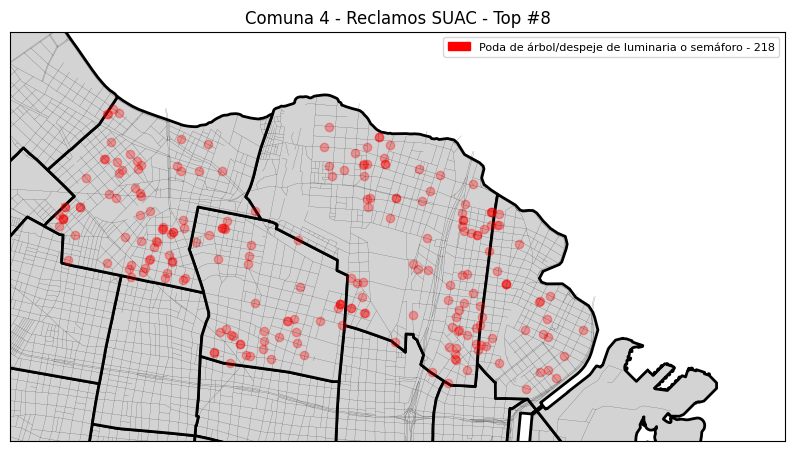

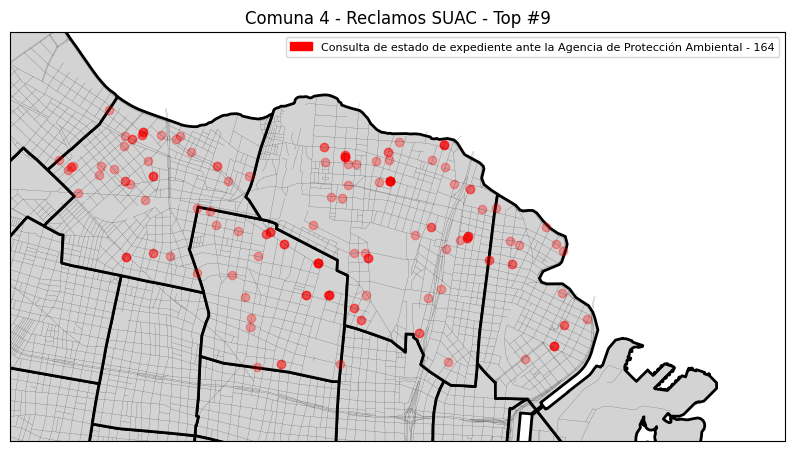

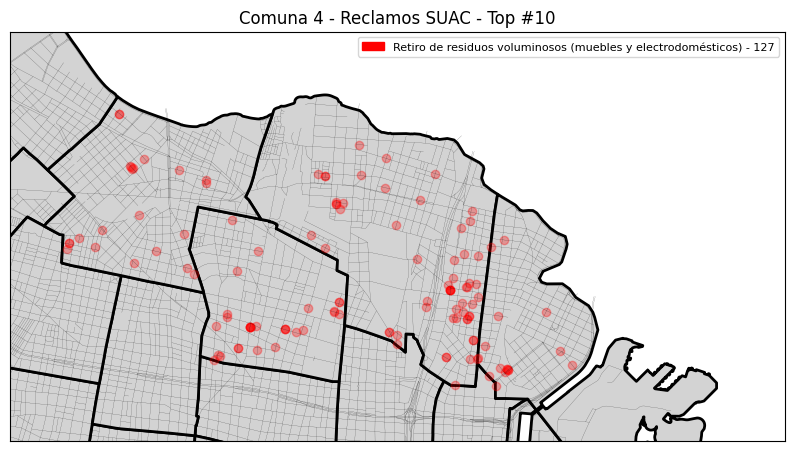

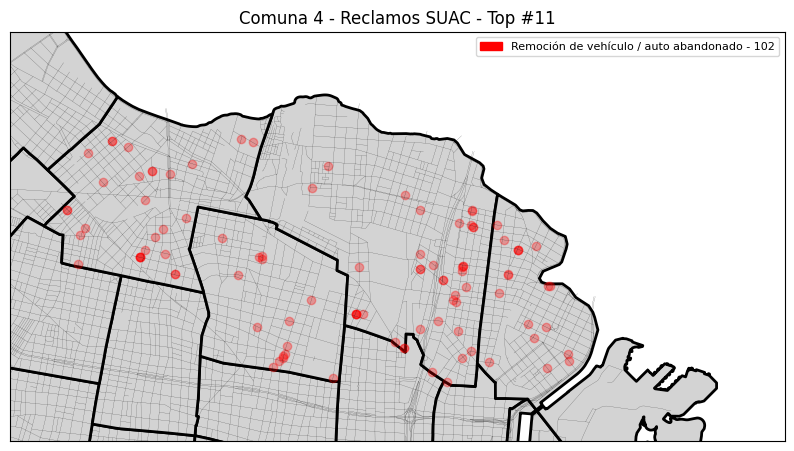

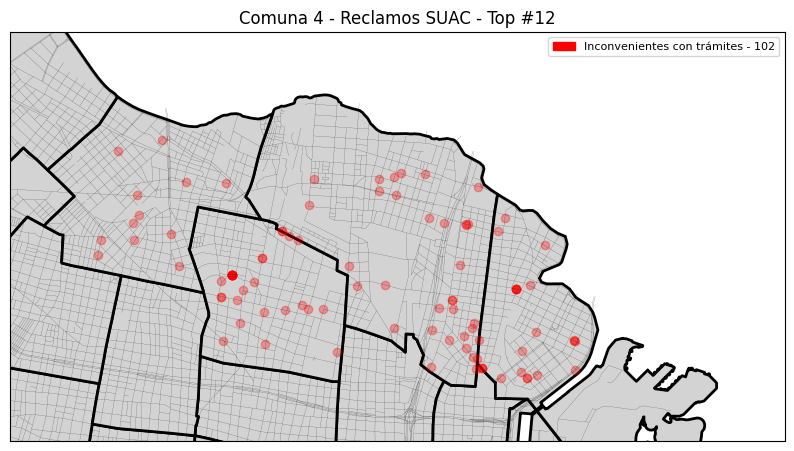

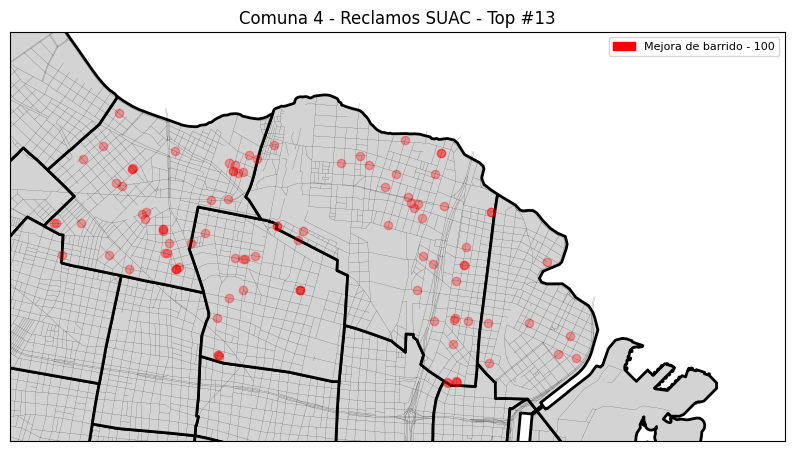

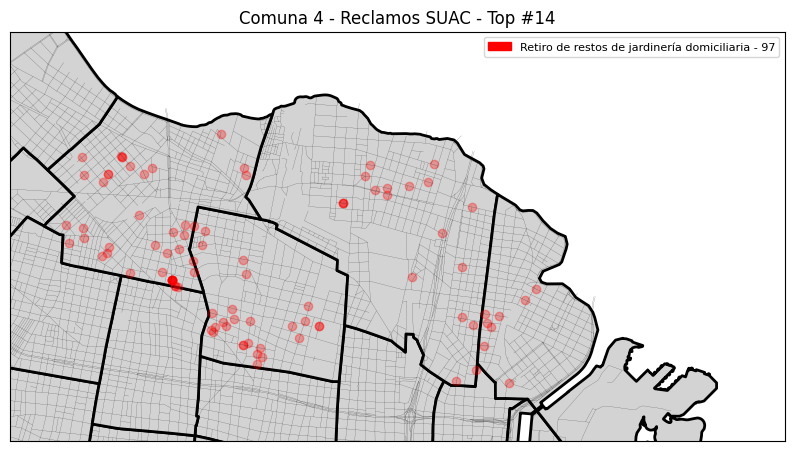

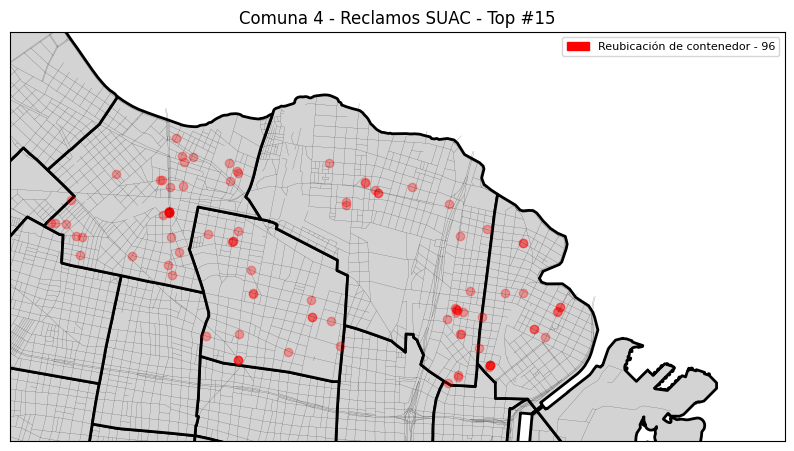

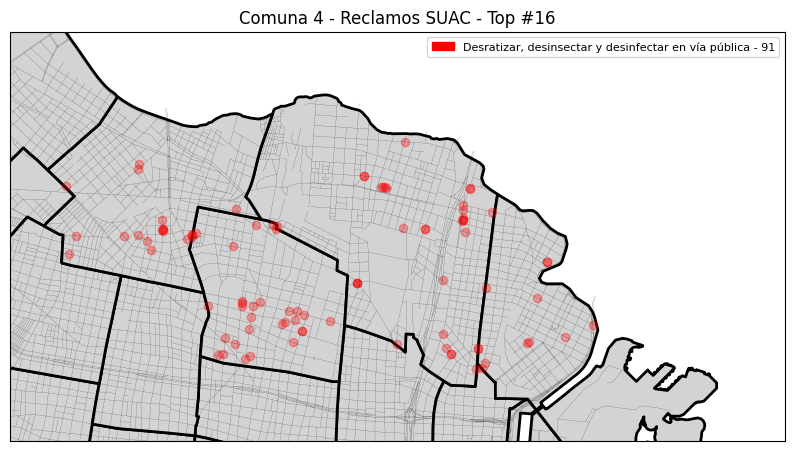

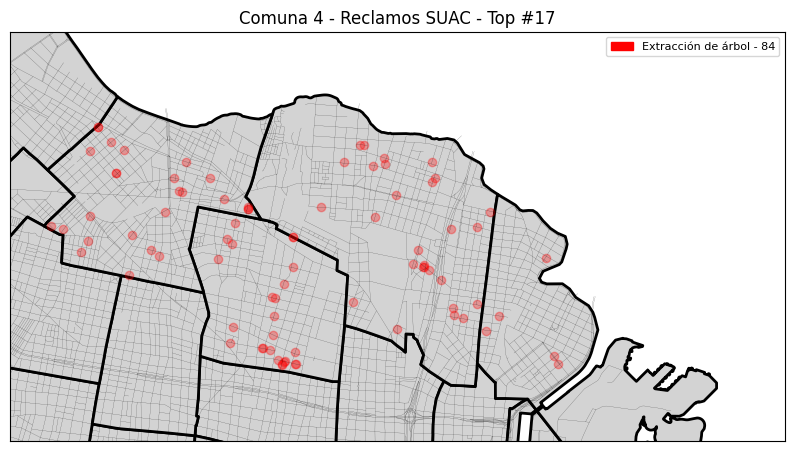

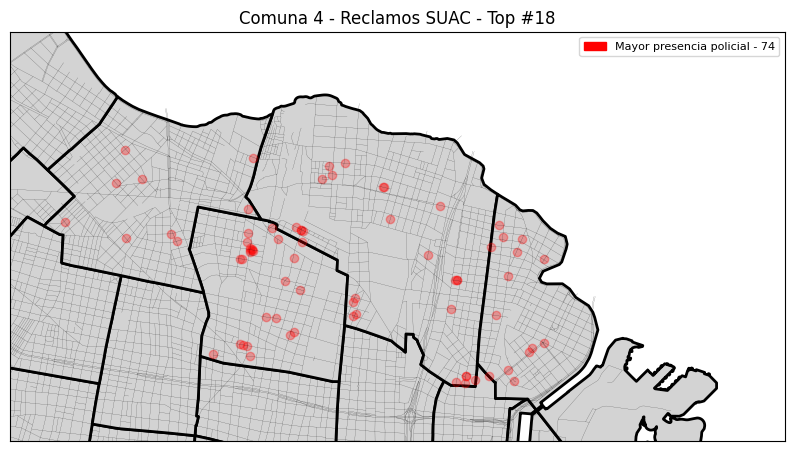

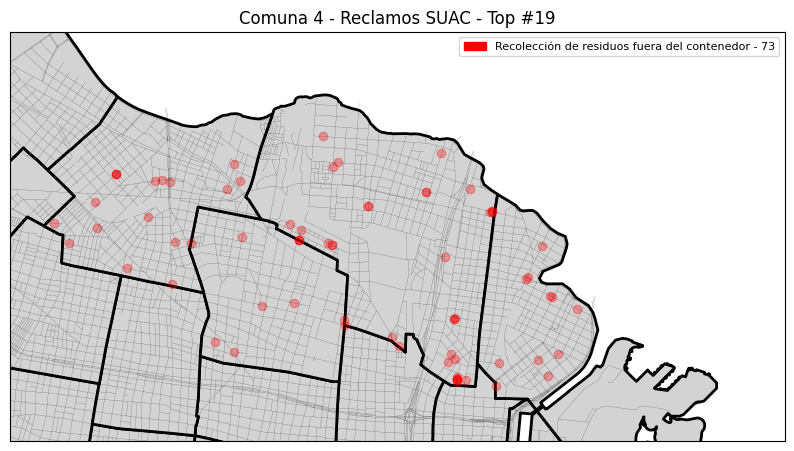

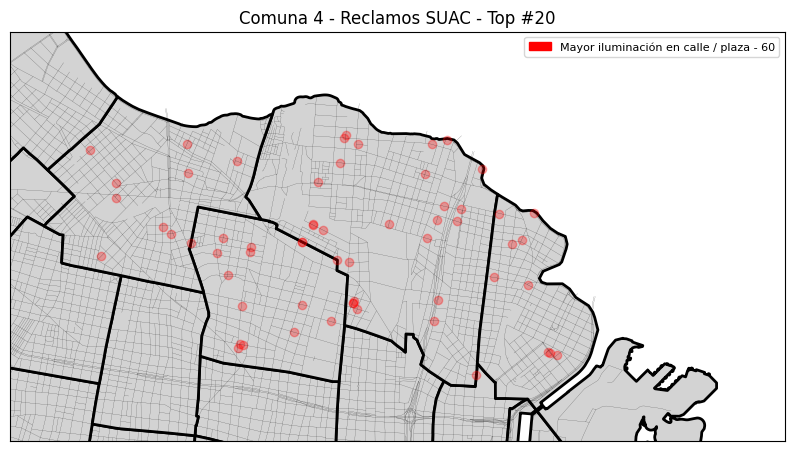

In [207]:
import matplotlib.patches as mpatches



for prestacion in prestaciones_c4[prestaciones_c4["cumsum"] <= pct80].iterrows():

    prestacion_name = prestacion[1].prestacion
    prestacion_cantidad = prestacion[1].contacto
    prestacion_categoria = prestacion[1].categoria


    ## Plot scatter plot exclusively for that prestacion
    
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    streets.plot(ax=ax, linewidth=.1, color="black")
    barrios.plot(ax=ax, color="lightgray", linewidth=2, edgecolor="black")
    ax.scatter(
        x=suac_c4[suac_c4.prestacion == prestacion_name].lon,
        y=suac_c4[suac_c4.prestacion == prestacion_name].lat,
        alpha=.3, marker="o", color="red"
    )


    # limit to C4 bounds
    ax.set_xlim(COMUNA4_BBOX["x"])
    ax.set_ylim(COMUNA4_BBOX["y"])
    
    # add legend and title
    red_patch = mpatches.Patch(color='red', label=f"{prestacion_name} - {prestacion_cantidad}")
    ax.legend(handles=[red_patch], fontsize=8)
    
    # add title
    ax.set_title(f"Comuna 4 - Reclamos SUAC - Top #{prestacion[0]+1}")

    # remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.savefig(f"visuals/n{prestacion[0]+1}_{prestacion_categoria} - {prestacion_name.replace('/', '')}.png", dpi=300, bbox_inches="tight")

In [163]:
suac_c4[suac_c4.prestacion.str.contains("electricidad")].lon.value_counts(), suac_c4[suac_c4.prestacion.str.contains("electricidad")].lat.value_counts()
## reclamos sobre electricidad están en los mismos 4 puntos

(-58.398481    391
 -58.402941     40
 -58.354202      6
 -58.354202      4
 Name: lon, dtype: int64,
 -34.654819    391
 -34.650617     40
 -34.635781     10
 Name: lat, dtype: int64)

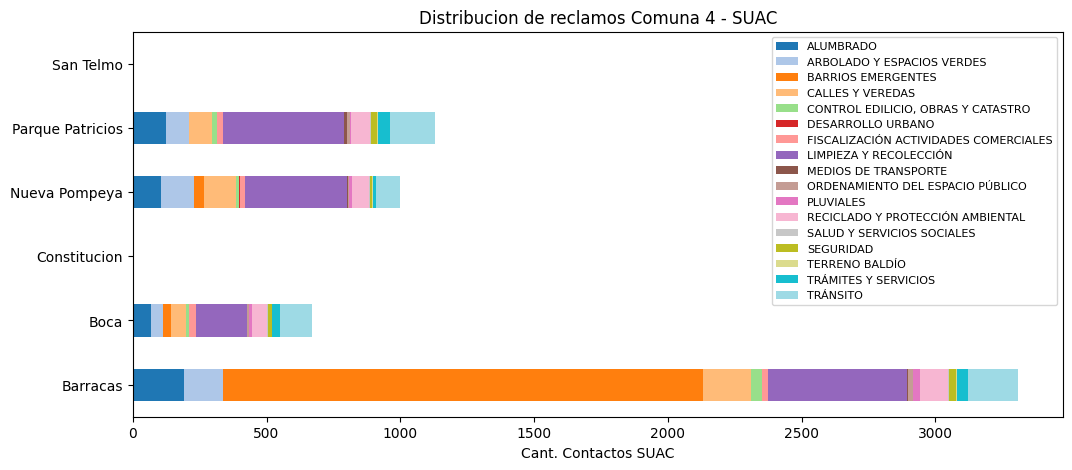

In [206]:
suac_c4.groupby([
    "domicilio_barrio", "categoria"
])\
    .contacto.count()\
    .fillna(0)\
    .unstack()\
    .plot(kind="barh", ylabel="", stacked=True, xlabel="Cant. Contactos SUAC", figsize=(12,5), colormap="tab20")
plt.gca().legend(fontsize=8)

# save figure
plt.title("Distribucion de reclamos Comuna 4 - SUAC")

plt.savefig("./visuals/reclamos-barrios.png", dpi=300, bbox_inches="tight")

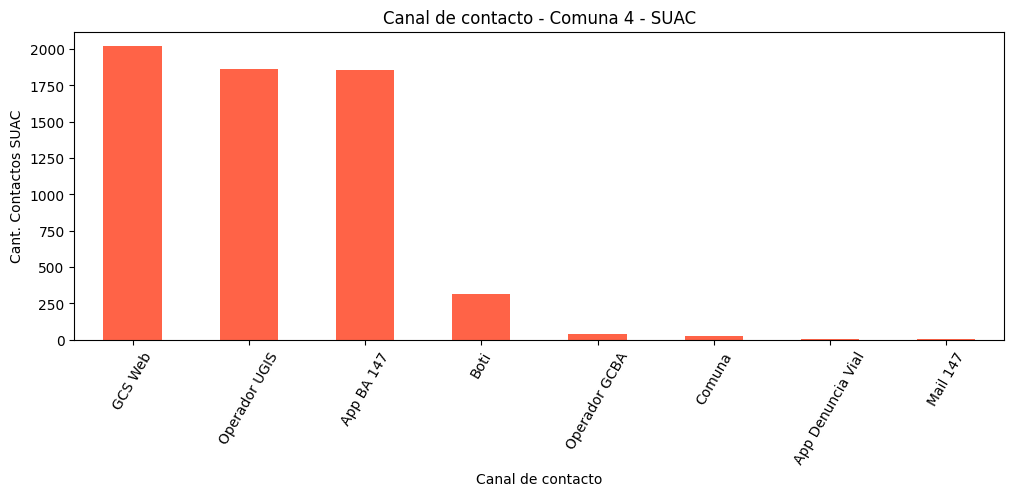

In [204]:
suac_c4.sample()
suac_c4.groupby("canal").contacto.size()\
    .sort_values(ascending=False)\
    .plot(kind="bar", figsize=(12,4), ylabel="Cant. Contactos SUAC", xlabel="Canal de contacto", title="Canal de contacto - Comuna 4 - SUAC", color="tomato")
plt.xticks(rotation=60)
plt.savefig("visuals/Comuna4 - contactos por canal.png", dpi=300, bbox_inches="tight")

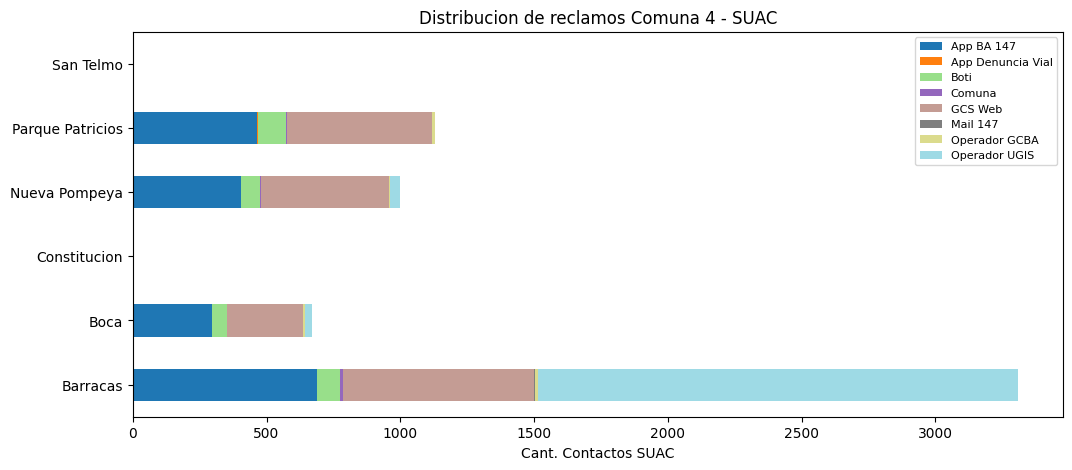

In [205]:
suac_c4.groupby([
    "domicilio_barrio", "canal"
])\
    .contacto.count()\
    .fillna(0)\
    .unstack()\
    .plot(kind="barh", ylabel="", stacked=True, xlabel="Cant. Contactos SUAC", figsize=(12,5), colormap="tab20")
plt.gca().legend(fontsize=8)

# save figure
plt.title("Distribucion de reclamos Comuna 4 - SUAC")

plt.savefig("./visuals/canal-barrios.png", dpi=300, bbox_inches="tight")

In [210]:
suac_c4[suac_c4.domicilio_barrio.str.lower().str.contains("constit")]

contacto  periodo               categoria             subcategoria  \
38587  00038764/22   202201  LIMPIEZA Y RECOLECCIÓN  LIMPIEZA DE VÍA PÚBLICA   

                                         prestacion tipo_prestacion  \
38587  Recolección de residuos fuera del contenedor       Solicitud   

      fecha_ingreso hora_ingreso  domicilio_comuna domicilio_barrio  \
38587    2022-01-31     12:15:37               4.0     Constitucion   

           domicilio_calle  domicilio_altura domicilio_esquina_proxima  \
38587  VELEZ SARSFIELD AV.               NaN               CASEROS AV.   

             lat        lon       canal     genero estado_del_contacto  \
38587 -34.634121 -58.390359  App BA 147  Masculino             Cerrado   

      fecha_cierre_contacto                     geometry  
38587            2022-02-01  POINT (-58.39036 -34.63412)

## Seguridad

### Cuantitativo

In [44]:
seguridad_c4 = suac_data_gdf[(suac_data_gdf.categoria == "SEGURIDAD")\
                              & (suac_data_gdf.geometry.within(comuna_4.geometry.iloc[0]))]
seguridad_c4.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74 entries, 1375 to 98848
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   contacto                   74 non-null     object        
 1   periodo                    74 non-null     int64         
 2   categoria                  74 non-null     object        
 3   subcategoria               74 non-null     object        
 4   prestacion                 74 non-null     object        
 5   tipo_prestacion            74 non-null     object        
 6   fecha_ingreso              74 non-null     datetime64[ns]
 7   hora_ingreso               74 non-null     object        
 8   domicilio_comuna           74 non-null     float64       
 9   domicilio_barrio           74 non-null     object        
 10  domicilio_calle            74 non-null     object        
 11  domicilio_altura           68 non-null     float64       
 

In [45]:
seguridad_c4.subcategoria.value_counts()

OTROS    74
Name: subcategoria, dtype: int64

In [46]:
seguridad_c4.prestacion.value_counts()

Mayor presencia policial    74
Name: prestacion, dtype: int64

In [47]:
seguridad_c4["mes"] = seguridad_c4.fecha_ingreso.dt.month
seguridad_c4["dia"] = seguridad_c4.fecha_ingreso.dt.day

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [52]:
seguridad_c4.estado_del_contacto.value_counts()

Abierto    74
Name: estado_del_contacto, dtype: int64

In [55]:
seguridad_c4.groupby([
    "prestacion", "tipo_prestacion", "domicilio_barrio"
]).contacto.count().to_frame()

contacto
prestacion               tipo_prestacion domicilio_barrio          
Mayor presencia policial Reporte         Barracas                26
                                         Boca                    14
                                         Nueva Pompeya            9
                                         Parque Patricios        25

### Visuals

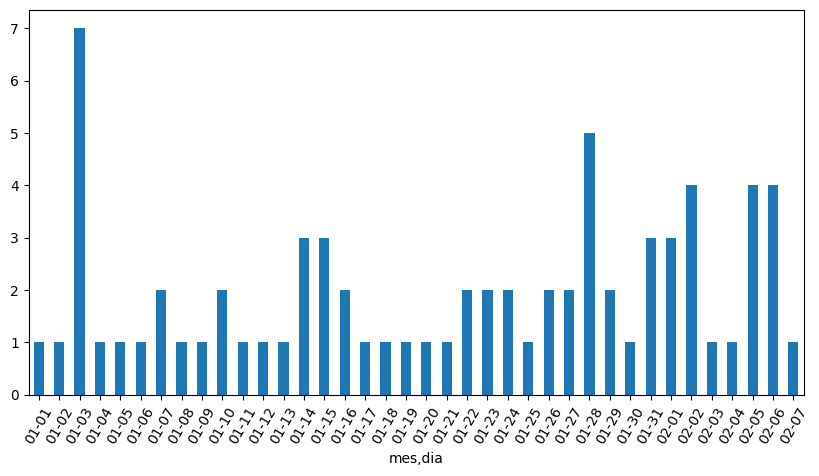

In [48]:
# seguridad_c4.groupby(["mes", "dia"]).size().plot(kind="bar")

# Format xticks to show format "MONTH - DAY"
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1, figsize=(10, 5))

seguridad_c4.groupby(["mes", "dia"]).size().plot(ax=ax, kind="bar")

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# rotate xticks 60 degrees
plt.xticks(rotation=60)
plt.show()

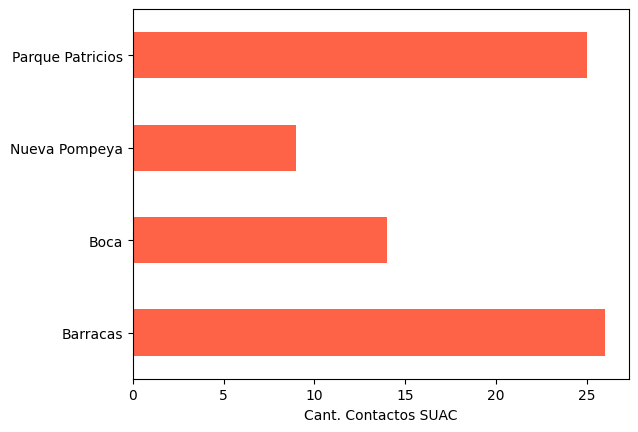

In [211]:
seguridad_c4.groupby([
    "prestacion", "tipo_prestacion", "domicilio_barrio"
]).contacto.count().to_frame().reset_index().plot(kind="barh", color="tomato", x="domicilio_barrio", y="contacto", ylabel="", xlabel="Cant. Contactos SUAC")
plt.gca().legend().set_visible(False)

# save figure
plt.savefig("./visuals/seguridad-barrios.png", dpi=300, bbox_inches="tight")

In [230]:
suac_c4[suac_c4.categoria == "SEGURIDAD"].canal.value_counts()

App BA 147    47
GCS Web       27
Name: canal, dtype: int64

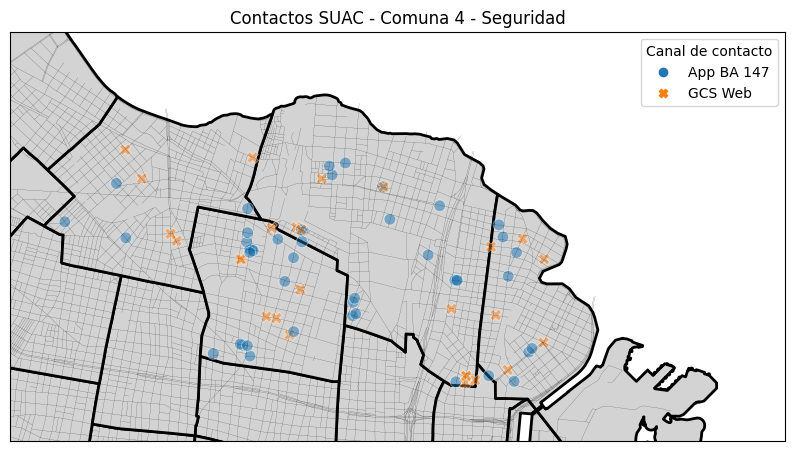

In [234]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
streets.plot(ax=ax, linewidth=.1, color="black")
barrios.plot(ax=ax, color="lightgray", linewidth=2, edgecolor="black")
sns.scatterplot(
    data=suac_c4[suac_c4.categoria == "SEGURIDAD"],
    x="lon",
    y="lat",
    ax=ax,
    s=70,
    alpha=.5,
    hue="canal",
    style="canal"
)


ax.set_title("Contactos SUAC - Comuna 4 - Seguridad")
ax.legend(title="Canal de contacto")
# limit to C4 bounds
ax.set_xlim(COMUNA4_BBOX["x"])
ax.set_ylim(COMUNA4_BBOX["y"])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
# save figure
plt.savefig("./visuals/seguridad-c4-distribucion-geografica.png", dpi=300, bbox_inches="tight")


<Axes: title={'center': 'SEGURIDAD'}, xlabel='lon', ylabel='lat'>

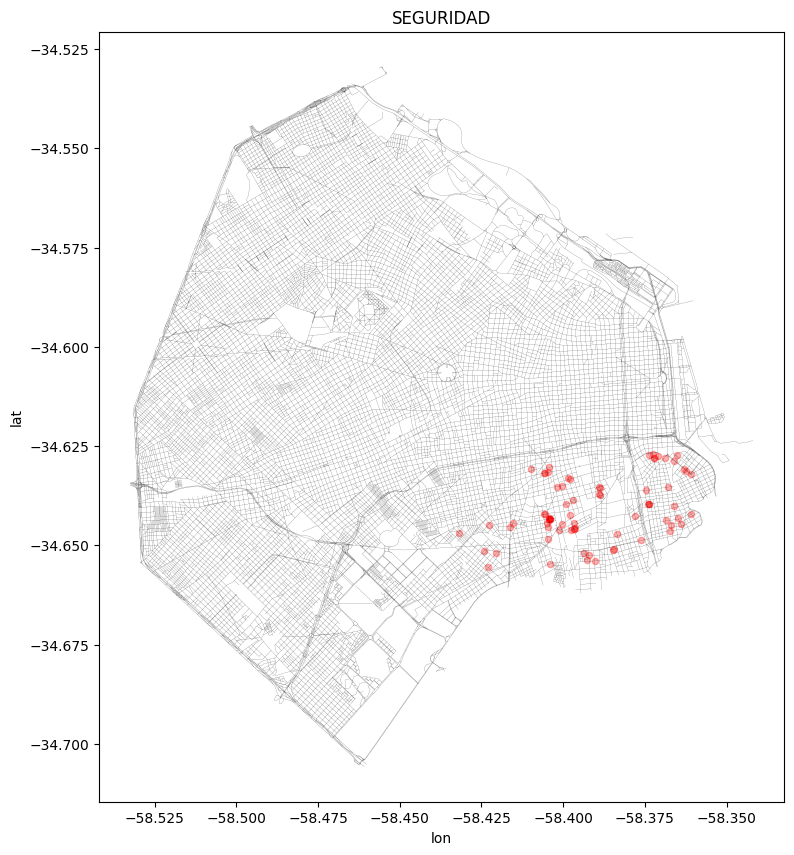

In [49]:
plot_map_category(seguridad_c4, "SEGURIDAD", alpha=.3, color="red")

# 2021

In [236]:
suac_2021 = pd.read_csv("data/sistema-unico-de-atencion-ciudadana-2021.csv", sep=";")

# convert to geodataframe
suac_2021_gdf = gpd.GeoDataFrame(suac_2021, geometry=gpd.points_from_xy(suac_2021.lon, suac_2021.lat), crs="EPSG:4326")

suac_2021.info()

/tmp/ipykernel_21872/686200651.py:1: DtypeWarning: Columns (10,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  suac_2021 = pd.read_csv("data/sistema-unico-de-atencion-ciudadana-2021.csv", sep=";")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754638 entries, 0 to 754637
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   contacto                   754638 non-null  object  
 1   periodo                    754638 non-null  int64   
 2   categoria                  754413 non-null  object  
 3   subcategoria               751542 non-null  object  
 4   prestacion                 754637 non-null  object  
 5   tipo_prestacion            754637 non-null  object  
 6   fecha_ingreso              754638 non-null  object  
 7   hora_ingreso               754638 non-null  object  
 8   domicilio_comuna           735585 non-null  float64 
 9   domicilio_barrio           735577 non-null  object  
 10  domiclio_calle             440748 non-null  object  
 11  domicilio_altura           641040 non-null  float64 
 12  domicilio_esquina_proxima  28994 non-null   object  
 13  lat           

In [249]:
suac_2021.fecha_ingreso = suac_2021.fecha_ingreso.apply(lambda s: s.replace("/", "-"))
suac_2021.fecha_cierre_contacto = suac_2021.fecha_cierre_contacto.fillna("NA").apply(lambda s: s.replace("/", "-"))

In [264]:
suac_2021.fecha_ingreso = suac_2021.fecha_ingreso.apply(lambda s: s.replace("00:00:00", "").strip())

In [267]:
def shift_years(s):
    """
    Process date strings where the year is placed at the beginning and place it at the end
    """
    if s.startswith("2021"):
        return "-".join(s.split("-")[::-1])
    else:
        return s

In [269]:
suac_2021.fecha_ingreso = suac_2021.fecha_ingreso.apply(shift_years)

In [270]:
suac_2021.fecha_ingreso.apply(lambda s: s.split("-")[2]).value_counts()

2021    669171
21       85467
Name: fecha_ingreso, dtype: int64

In [271]:
def parse_year_2021(date):
    """
    Replace year spelled 21 with 2021 in date strings
    """
    if "21" == date.split("-")[-1]:
        return "-".join(date.split("-")[:-1] + ["2021"])
    else:
        return date
    

In [273]:
suac_2021.fecha_ingreso.apply(parse_year_2021).apply(lambda s: s.split("-")[2]).value_counts()
suac_2021.fecha_ingreso = suac_2021.fecha_ingreso.apply(parse_year_2021)

In [274]:
suac_2021.fecha_ingreso = pd.to_datetime(suac_2021.fecha_ingreso, format="%d-%m-%Y")
# suac_2021.fecha_cierre_contacto = pd.to_datetime(suac_2021.fecha_cierre_contacto, format="%d-%m-%y")

In [275]:
suac_2021.fecha_ingreso.min(), suac_2021.fecha_ingreso.max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [277]:
# filter out only comuna 4
suac_c4_2021 = suac_2021_gdf[suac_2021_gdf.geometry.within(comuna_4.geometry.iloc[0])]
suac_c4_2021.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 43351 entries, 14 to 754590
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   contacto                   43351 non-null  object  
 1   periodo                    43351 non-null  int64   
 2   categoria                  43335 non-null  object  
 3   subcategoria               43157 non-null  object  
 4   prestacion                 43351 non-null  object  
 5   tipo_prestacion            43351 non-null  object  
 6   fecha_ingreso              43351 non-null  object  
 7   hora_ingreso               43351 non-null  object  
 8   domicilio_comuna           43351 non-null  float64 
 9   domicilio_barrio           43351 non-null  object  
 10  domiclio_calle             19989 non-null  object  
 11  domicilio_altura           29326 non-null  float64 
 12  domicilio_esquina_proxima  1152 non-null   object  
 13  lat                  

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/pygeos/predicates.py:906: RuntimeWarning: invalid value encountered in within
  return lib.within(a, b, **kwargs)
